## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

print("Modules imported successfully :)")

Modules imported successfully :)


## Load The Data

In [2]:
df_train = pd.read_csv("Datasets/house-prices-advanced-regression-techniques/train.csv")

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Analysing The Dependent Variable ("SalePrice")

In [4]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We notice: Minimum price is an actual one, and not a zero.

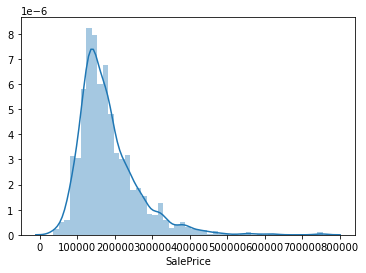

In [18]:
#Histogram
sns.distplot(df_train["SalePrice"])

1. This distribution deviates from a Normal Distribution
2. It's positively skewed (The tail on the right is longer than left tail. This also means that the mean and median are greater than the mode.)
3. It shows peakedness (Peak is high and narrow, related to kurtosis)

In [5]:
#Skewness and Kurtosis
print("Skewness : %f" % df_train["SalePrice"].skew())
print("Kurtosis : %f" % df_train["SalePrice"].kurt())

Skewness : 1.882876
Kurtosis : 6.536282


### Relationship with numerical variables

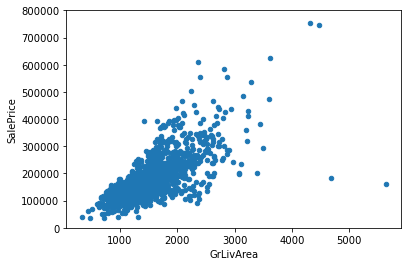

In [6]:
#scatterplot grlivarea/saleprice
#GrLivArea: Above grade (ground) living area square feet
var = "GrLivArea"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis = 1)
data.plot(kind = "scatter", x = var, y = "SalePrice", ylim = (0,800000))

SalePrice, and GrLivArea have a linear relationship

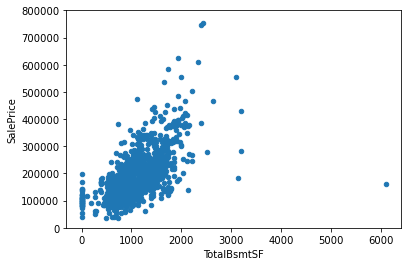

In [7]:
#scatterplot TotalBsmtSF/saleprice
#TotalBsmtSF: Total square feet of basement area

var = "TotalBsmtSF"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis = 1)
data.plot(kind = "scatter", x = var, y = "SalePrice", ylim = (0,800000))

### Relationship with Categorical Features

In [9]:
df_train["OverallQual"].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

(-0.5, 9.5, 0.0, 800000.0)

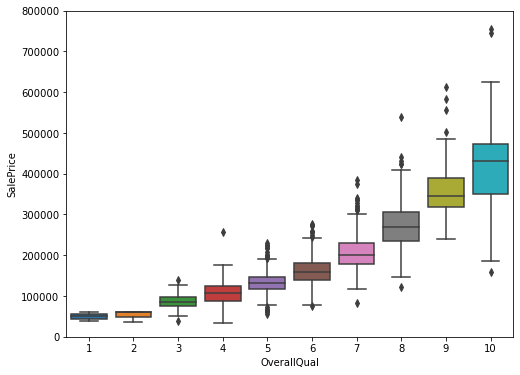

In [8]:
#Boxplot overallqual/saleprice
#OverallQual: Overall material and finish quality

var = "OverallQual"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis = 1)
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x= var, y = "SalePrice", data = data)
fig.axis(ymin = 0, ymax = 800000)

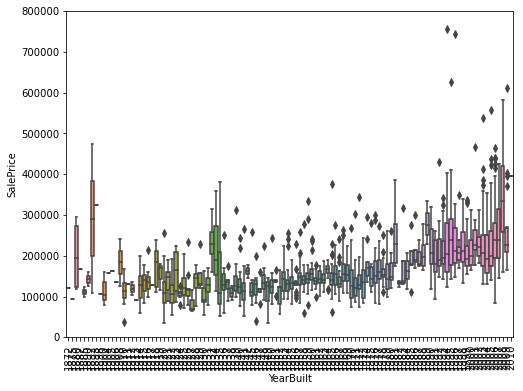

In [25]:
#Boxplot YearBuilt/saleprice
#YearBuilt: Original construction date

var = "YearBuilt"
data = data = pd.concat([df_train["SalePrice"], df_train[var]], axis = 1)
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x= var, y = "SalePrice", data = data)
fig.axis(ymin = 0, ymax = 800000)
plt.xticks(rotation = 90);

#### Conclusions

1. "GrLivArea" and "TotalBsmtSF" have linear relationships with "Saleprice". Both relationships are positive.
2. "OvearllQual" and "YearBuilt" have strong relationships with "SalePrice".

## Correlations

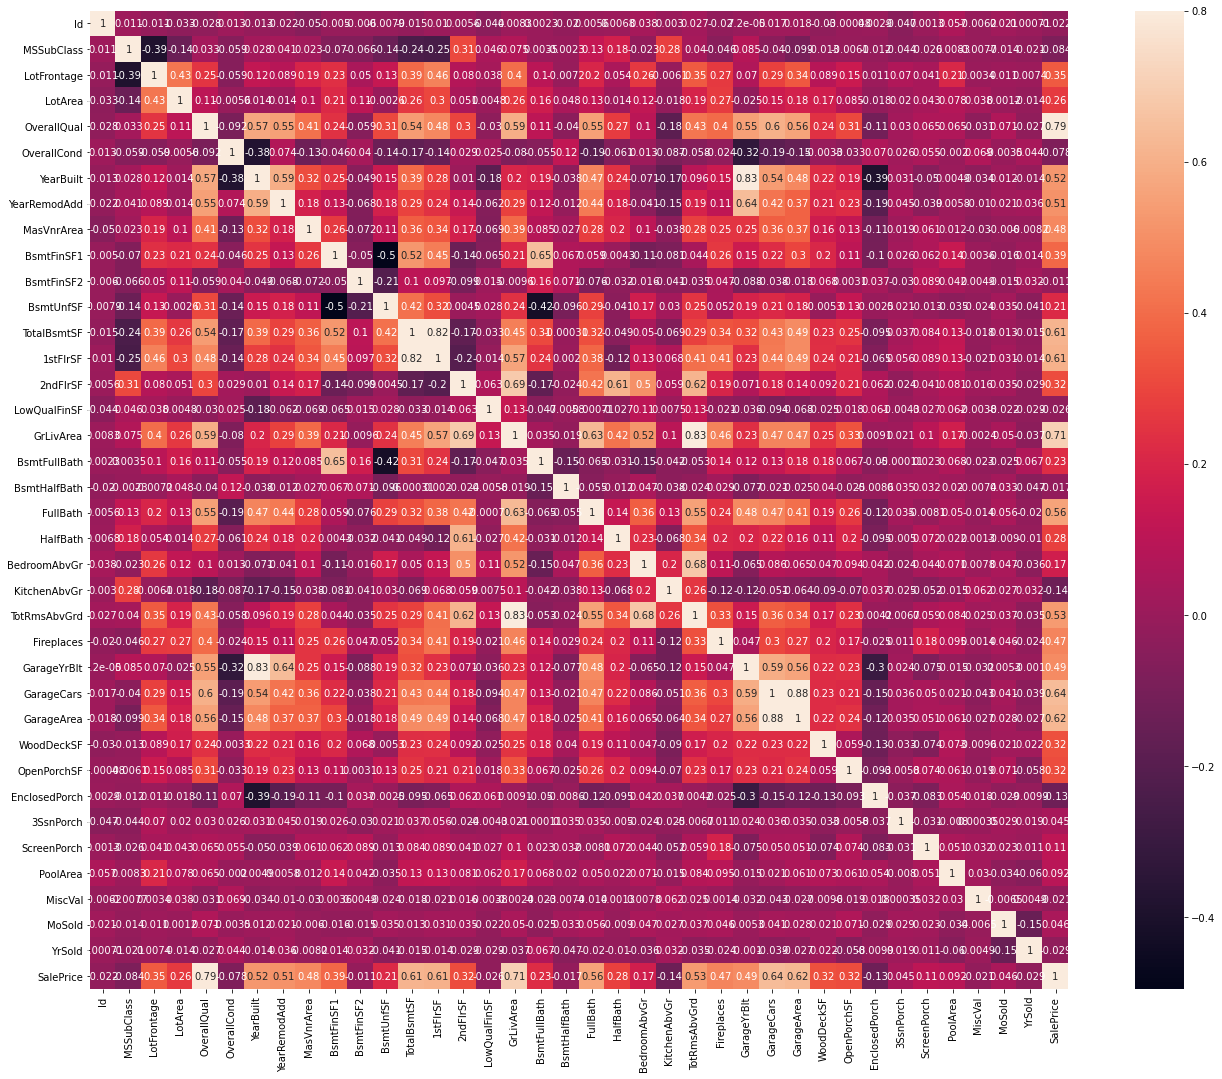

In [27]:
#correlation matrix

corrmat = df_train.corr()
f, ax = plt.subplots(figsize = (24,18))
sns.heatmap(corrmat, vmax = 0.8, annot = True, square = True, ax = ax)

From the correlation matrix we can see that there are strong correlations between:

1. 'TotalBsmtSF' and '1stFlrSF' variables
2. 'GarageCars' and 'GarageArea'. But this maybe an indication of colinearity (Both feature give the same information).
3. 'SalePrice' with 'GrLivArea', 'TotalBsmtSF', and 'OverallQual'.

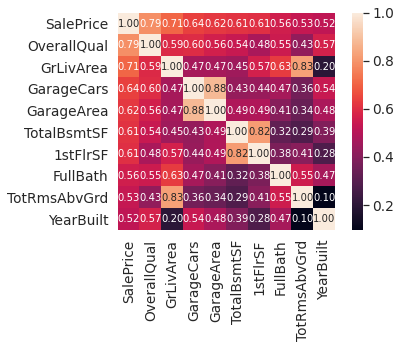

In [35]:
#SalePrice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

- 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, they appear to be colinear. We'll drop "GarageArea".
- Same for 'TotalBsmtSF' and '1stFloor' are colinear, so we'll drop "1stFloor".
- 'TotRmsAbvGrd' and 'GrLivArea' are also colinear. We'll drop 'TotRmsAbvGrd.

### ScatterPlots between dependent variable and correlated features

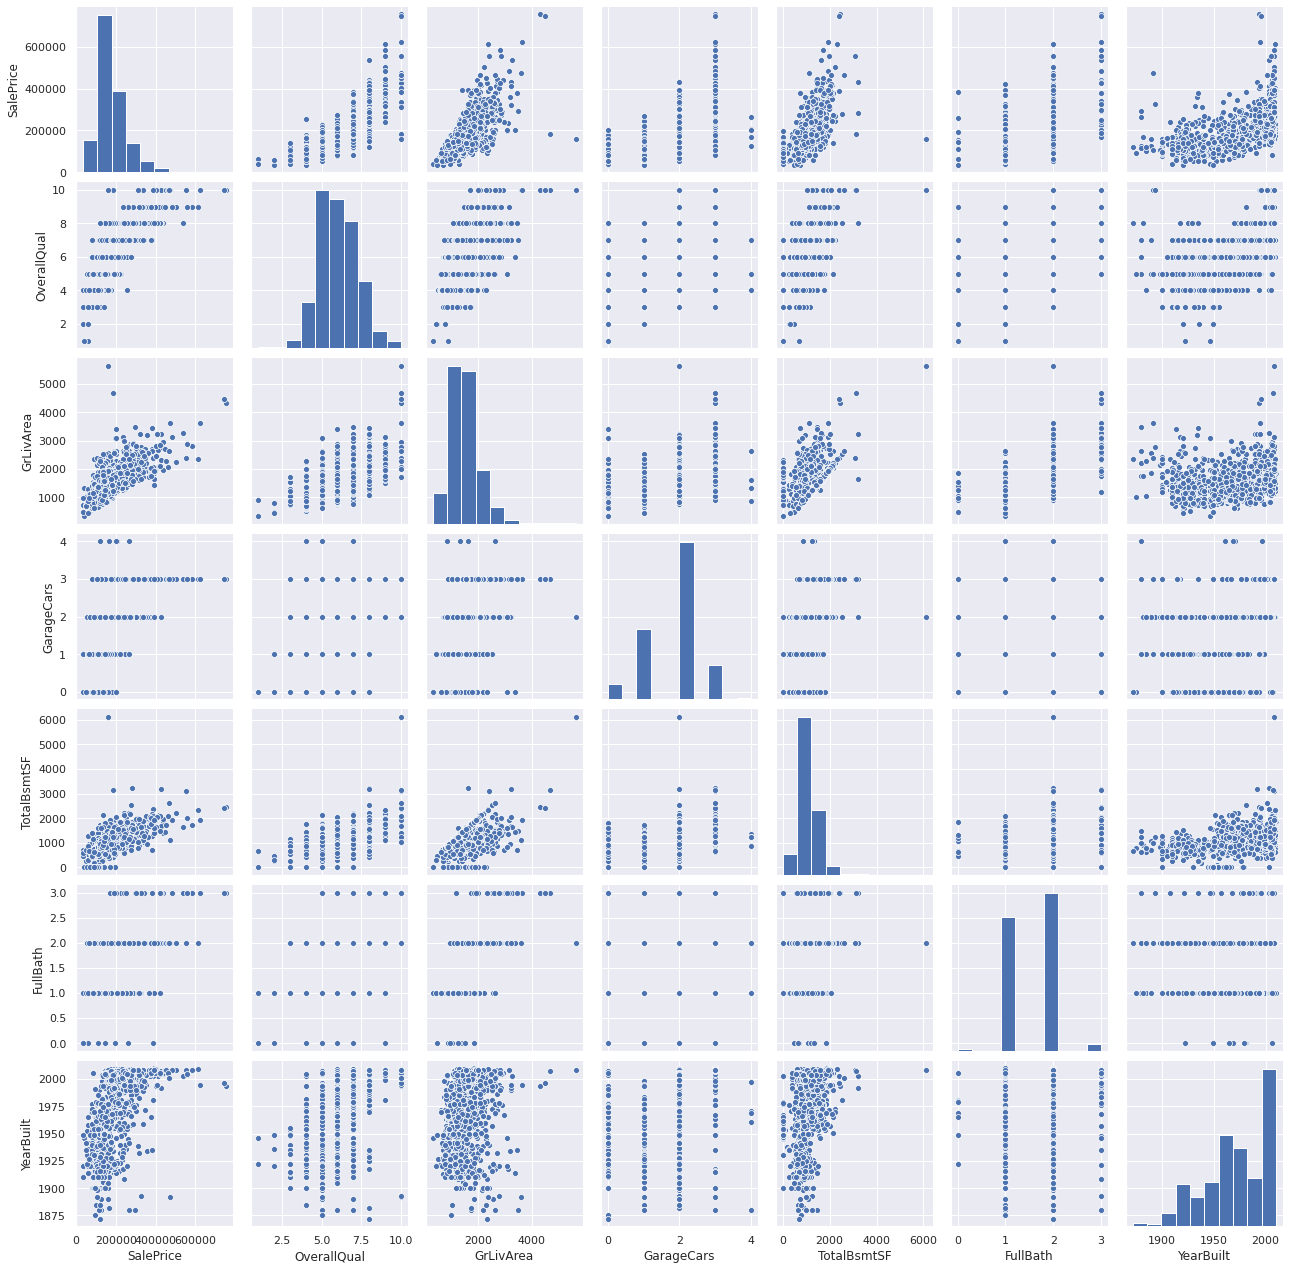

In [36]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea',
        'GarageCars', 'TotalBsmtSF', 'FullBath',
        'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

- We find that there is a linear relation between 'TotalBsmtSF' and 'GrLiveArea'.

- There seems like an exponential relationship between "YearBuilt" and "SalePrice".

## Missing Data

In [38]:
#Missing Data
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ["Total", "Percent"])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [39]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data["Total"] > 1].index), axis = 1)
df_train = df_train.drop(df_train.loc[df_train["Electrical"].isnull()].index)

df_train.isnull().sum().max()

0

## Outliers

In [45]:
#Standardizing Data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis])
#np.newaxis increases the dimension of the array. 1d becomes 2d and so on

In [44]:
saleprice_scaled

array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ...,
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

In [46]:
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

print('outer range (low) of the distribution :')
print(low_range)
print('\nouter range (high) of the distribution :')
print(high_range)

outer range (low) of the distribution :
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution :
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


## Bivariate Analysis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


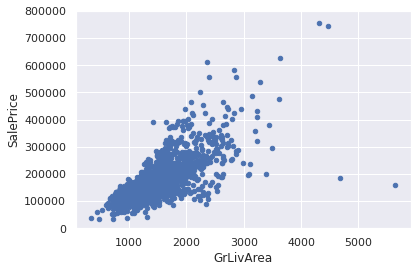

In [47]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We look again and find that there are two outlier points (that have highest Area) that don't follow the trend of the remaining points. So, we will delete them.

In [48]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


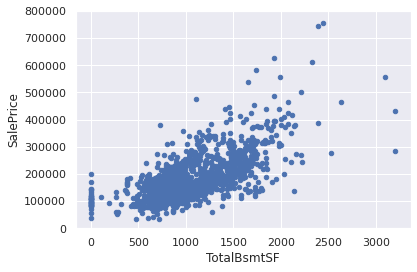

In [49]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));